# Diamond Price Prediction 

The aim of this analysis is to predict the price of diamonds based on their characteristics.
The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset
contains 50000 observations and 10 variables.

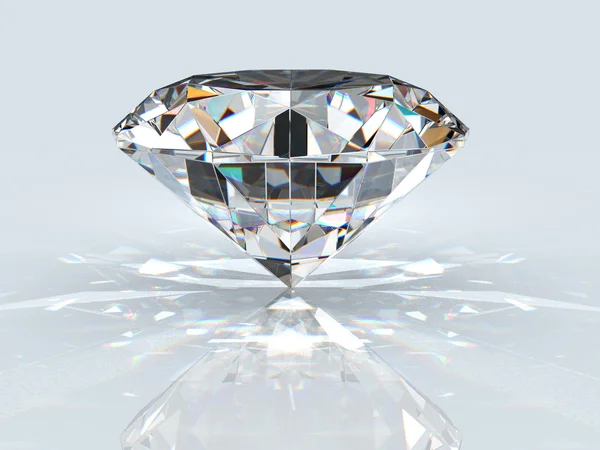
### Data Dictionary

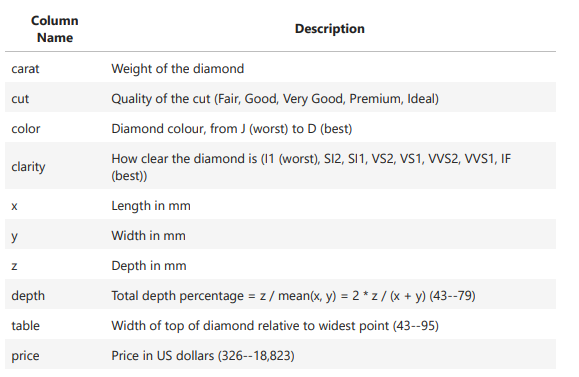

In [2]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [6]:
df.shape

(50000, 10)

In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
cols = ['cut','color','clarity']
for col in cols:
    print(df[col].value_counts())

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64
color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64
clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64


In [11]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Exploratory Data Analysis

<Axes: xlabel='carat', ylabel='Count'>

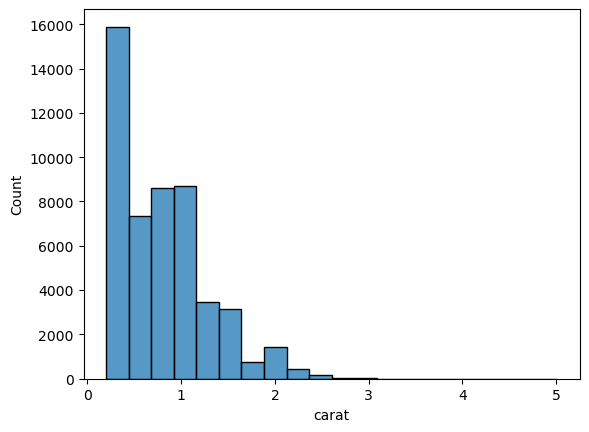

In [13]:
sns.histplot(x='carat',data=df,bins=20)

Most diamonds weigh one carat or less.

<Axes: xlabel='price', ylabel='Count'>

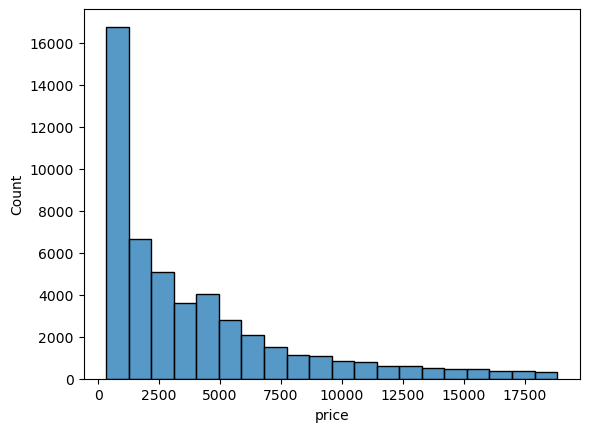

In [15]:
sns.histplot(x='price',data=df,bins=20)

Most diamonds cost less than 7500$.

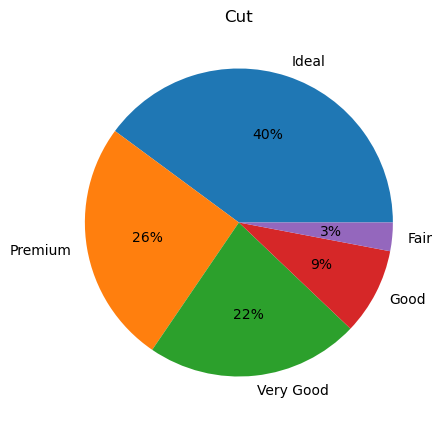

In [17]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),data=df,labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%.00f%%')
plt.title('Cut')
plt.show()

The largest number of diamond are ideal cut. Second number of diamonds are premium cut. 

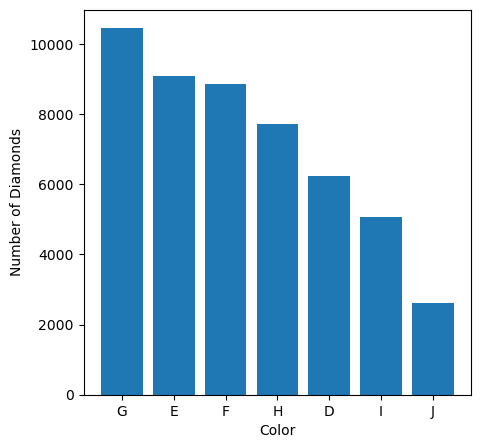

In [19]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

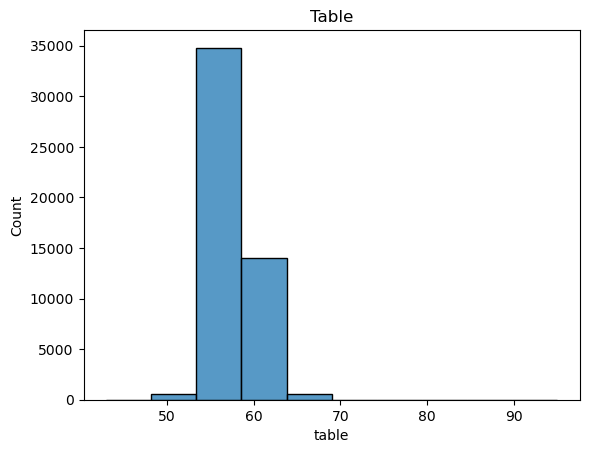

In [20]:
sns.histplot(df.table,bins=10)
plt.title('Table')
plt.show()

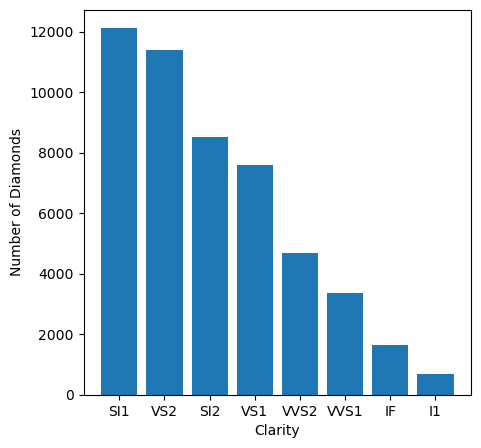

In [21]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

### Comparing Diamond's features with Price

<Axes: xlabel='cut', ylabel='price'>

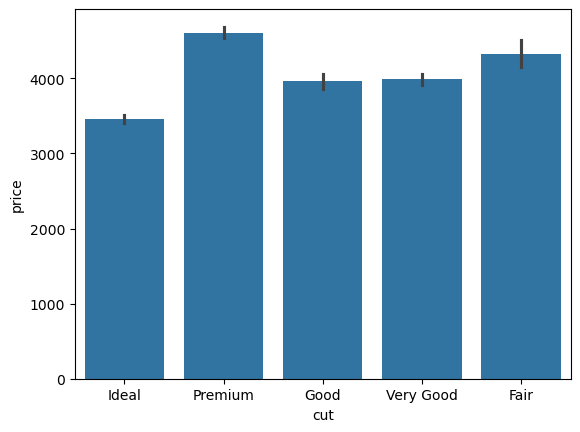

In [23]:
sns.barplot(x='cut',y='price',data=df)

<Axes: xlabel='color', ylabel='price'>

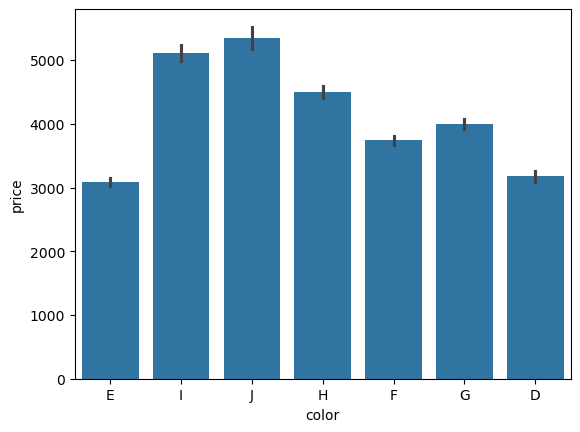

In [24]:
sns.barplot(x='color',y='price',data=df)

<Axes: xlabel='clarity', ylabel='price'>

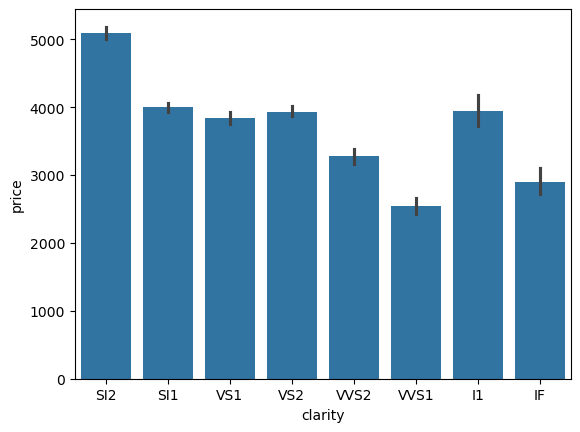

In [25]:
sns.barplot(x='clarity',y='price',data=df)

J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.

## Data Preprocessing 2

In [28]:
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Correlation

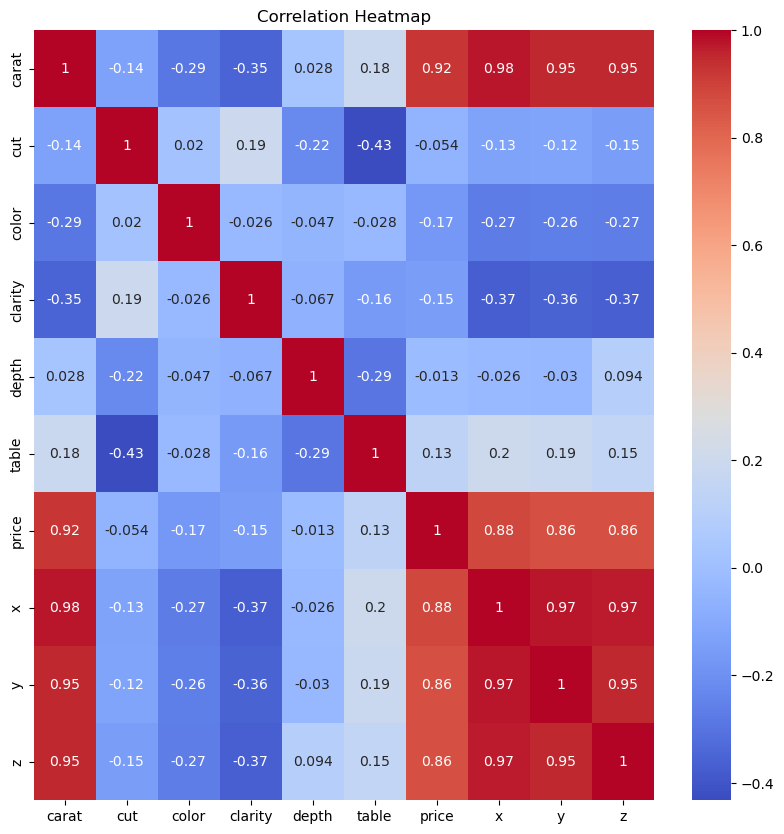

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Ploting the relationship between Price and Carat

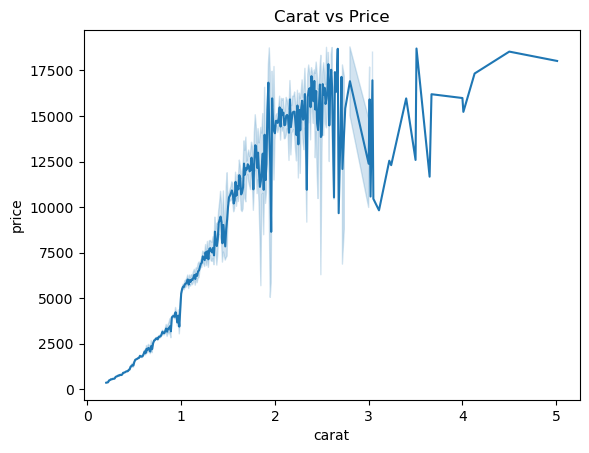

In [63]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

From the lineplot it is clear that the price of the diamond increases when the diamond weight increased. However, diamonds with less carat also have high
price. This is because of the other factors that affect the price of the diamond.

#### Diamond dimensions vs price

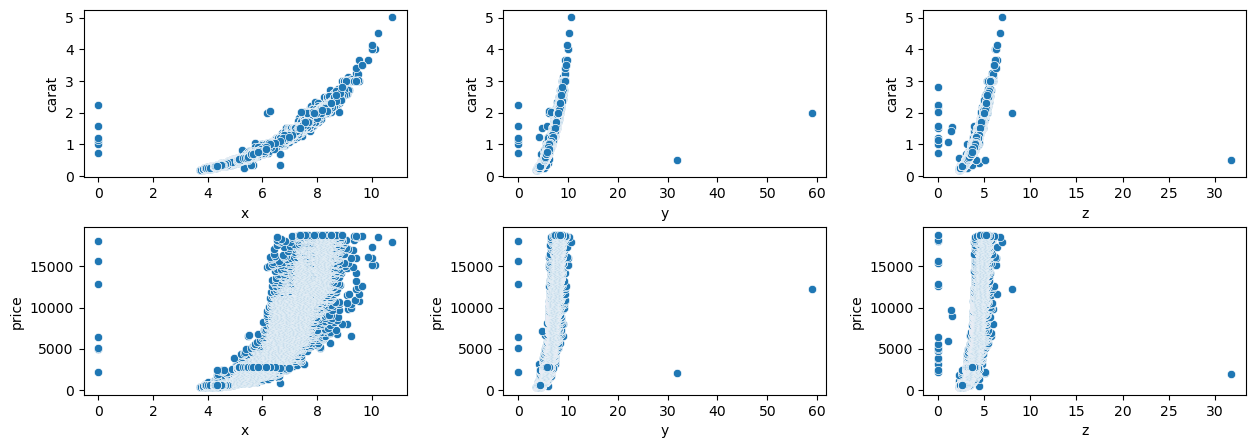

In [78]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
plt.subplots_adjust(wspace = 0.3,hspace=0.3)
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

Majority of the diamonds have x values between 4 and 8, y values between 4 and 10 and
z values between 2 and 6. Diamonds with other dimensions are very rare.

## Train test split 

In [93]:
X = df.drop('price',axis=1)
y = df.price

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

For predicting the diamond price I will use the
following algorithms:
1. Decision Tree Regressor
2. Random Forest Regressor3. Linear Regression

### Decision Tree Regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt


DecisionTreeRegressor()

In [104]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9636801342535413

In [106]:
dt_pred = dt.predict(X_test)

### Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [112]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9820202651332518

In [113]:
rf_pred = rf.predict(X_test)

### LinearRegression

In [117]:
from  sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [119]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9089238269387291

In [121]:
lr_pred = lr.predict(X_test)

## Model Evaluation

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Decision Tree Regressor

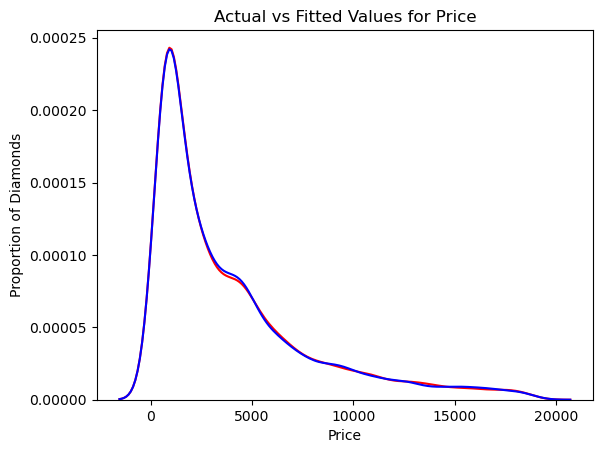

In [159]:
ax = sns.kdeplot(y_test,color='r',label='Actual Value')
sns.kdeplot(dt_pred,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [149]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy:',dt.score(X_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE: 749.2587400391136
Decision Tree Regressor Accuracy: 0.9636801342535413
Decision Tree Regressor MAE: 359.30365


### Random Forest Regressor

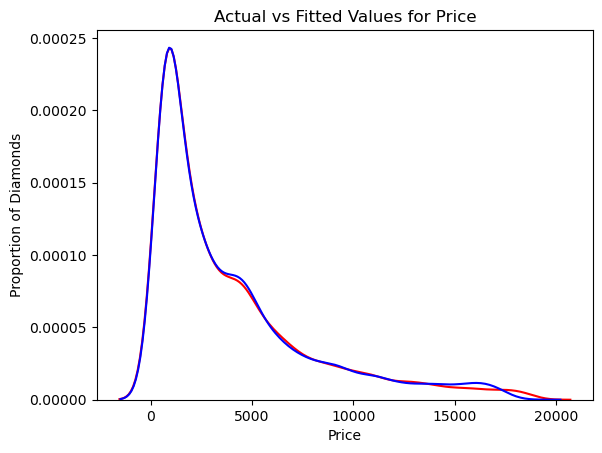

In [163]:
ax = sns.kdeplot(y_test,color='r',label='Actual Value')
sns.kdeplot(rf_pred,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [167]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(X_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Decision Tree Regressor RMSE: 527.170794347842
Decision Tree Regressor Accuracy: 0.9820202651332518
Decision Tree Regressor MAE: 263.0654256119048


### Linear Regression

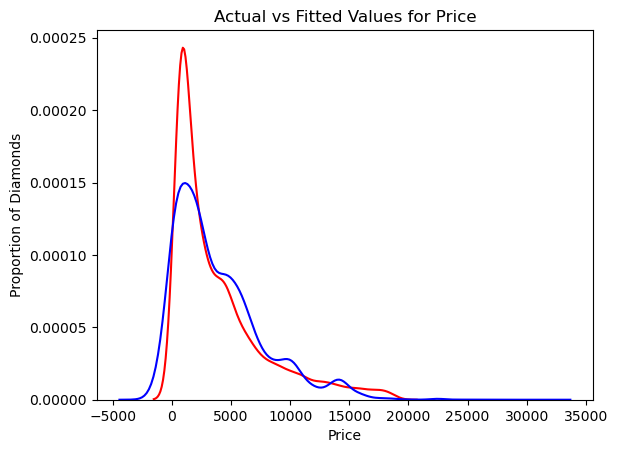

In [169]:
ax = sns.kdeplot(y_test,color='r',label='Actual Value')
sns.kdeplot(lr_pred,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [175]:
print('Linear Regression RMSE:',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('Linear Regression Accuracy:',lr.score(X_test,y_test))
print('Linear Regression MAE:',mean_absolute_error(y_test,lr_pred))

Linear Regression RMSE: 1186.4845496566313
Linear Regression Accuracy: 0.9089238269387291
Linear Regression MAE: 786.3247290524307


## Conclusion

Both the models, Decision Tree Regressor and Random Forest Regressor, have almost same accuracy. However, the Random Forest Regressor
model is slightly better than the Decision Tree Regressor model. Linear Reggresion model have the worst accuracy.

There is something interesting about the data. The price of the diamonds with J color
and I1 clarity is higher than the price of the diamonds with D color and IF clarity which
couldn't be explained by the models. This could be because of the other factors that
affect the price of the diamond.
